### Sentiment Analysis

In [2]:
#imports

import os
import numpy as np
import pandas as pd
import random
import re

from sklearn.model_selection import train_test_split

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import seaborn as sns
import shutil
import string
import matplotlib.pyplot as plt

from collections import Counter


#import tensorflow as tf
#from tensorflow.keras import layers
#from tensorflow.keras import losses


In [3]:
# Load the AFINN lexicon
afinn = {}
with open('AFINN-111.txt', 'r') as afinn_file:
    for line in afinn_file:
        term, score = line.strip().split('\t')
        afinn[term] = int(score)

In [4]:
# step 1: Get data.
# data from Kaggle: Restaurant Reviews
data = pd.read_csv('restaurant_reviews.csv')

data.head()
    

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 10000, dtype: object


(array([1735.,    9.,  684.,   19.,    0., 1193.,   47., 2373.,   69.,
        3832.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

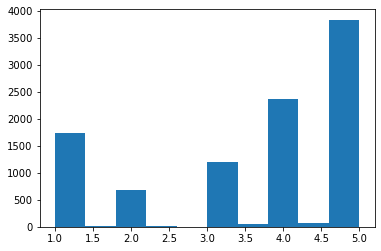

In [28]:
print(data['Review'])
#data['Restaurant'].unique()
plt.hist(pd.to_numeric(data['Rating'], errors ='coerce'))

Model ideas.
1) Simple, Naive Rule-based classifier

This approach would classify a rating by breaking it down into words, matching each word to a "sentiment score" and adding it together to get an approximate Sentiment Rating.

Break down and manage the text using NLTK
Assign sentiment scores using a Sentiment Lexicon (will try Afinn first)
Compile sentiment scores and return final score
Compare to rating given for validation/cross validation.

In [29]:
#model 1

#start with just one review.
n = random.randint(0,9999)
review = data['Review'][n]
print(n)
print(review)

3648
Visited here for buffet with my office team ,the place was very nice , ambience was very good and there is no veg biryani in buffet but they provided after asking that was very nice 

Overall experience- Good 

Will visit again and try some other dishes .


In [30]:
# cleaning and preprocessing necessary. using nltk

review = review.lower()
tokens = word_tokenize(review)
tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
print(tokens)

['visited', 'buffet', 'office', 'team', 'place', 'nice', 'ambience', 'good', 'veg', 'biryani', 'buffet', 'provided', 'asking', 'nice', 'overall', 'good', 'visit', 'try', 'dishes']


In [33]:
# Assign sentiment scores to words
sentiment_scores = [afinn.get(word, 0) for word in tokens]
print(sentiment_scores)

[0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0]


In [34]:
sum(sentiment_scores)

12

After some exploration with this method, I now want to try to do it with a larger portion of the data and produce some tables and graphs about the results I get.

In [35]:
#take first r reviews
# n = total - r
n = 9900
sample_reviews, _ = train_test_split(data['Review'], test_size=n/len(data['Review']), random_state=42)

sample_reviews.head()
indices = sample_reviews.index.tolist()
print(len(indices))

100


In [36]:
#clean it

def clean(text):
    if isinstance(text, str):
        text = text.lower()  
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
        return tokens
    else:
        # If text is not string, return it as is
        pass

clean_reviews = [clean(text) for text in sample_reviews]

#print(clean_reviews.head())

#  calculate score

#def calculate(text):
#    sentiment_scores = [afinn.get(word, 0) for word in text]
#    return sum(sentiment_scores)

def calculate2(text):
    errcounter = 0
    if text is None:
        #print("error found! ")
        #errcounter += 1
        #print(errcounter)
        return 0
    sentiment_scores = [afinn.get(word, 0) for word in text]
    return sum(sentiment_scores)

sample_scores = [calculate2(text) for text in clean_reviews]

print(sample_scores)

[8, 17, 5, 0, 7, -5, 12, 8, 14, 6, -2, -1, 30, 10, 14, 8, 3, 9, 8, 3, -5, 3, 3, 18, 6, 0, 9, 5, 8, 0, 10, 20, 8, 9, 0, 6, 6, 8, 40, 10, 3, 14, 0, 19, 3, 16, -5, 0, -6, -2, 13, 50, -4, 2, -2, 8, 14, 16, 0, 0, 9, 3, 7, 3, 0, 0, 4, 4, 4, 28, 12, 6, 9, 11, -7, 10, 9, 3, 5, 0, 8, 3, 3, -2, 9, 16, 7, 8, -3, 3, 10, 1, -5, 21, 0, 0, 3, 0, 10, 3]


In [37]:
original_ratings = data['Rating'].iloc[indices].values.tolist()

print(original_ratings)
print(sample_scores)

original_ratings.pop(59)
sample_scores.pop(59)

float_ratings = [float(x) if x != 'nan' else float('nan') for x in original_ratings]


['3', '5', '5', '5', '5', '2', '5', '4', '5', '4', '1', '1', '3', '4', '4', '4', '5', '5', '4', '4', '2', '3', '5', '5', '5', '2', '1', '3', '5', '1', '5', '4', '4.5', '4', '1', '3', '5', '5', '5', '5', '4', '5', '1', '3', '5', '4', '1', '1', '1', '1', '4', '4', '2', '4', '2', '4', '5', '4', '1', nan, '4', '5', '4', '4', '1', '1', '5', '4', '5', '4', '5', '5', '3', '5', '1', '5', '4', '5', '4', '2', '5', '5', '4', '1', '4', '4', '3', '5', '1', '5', '5', '1', '1', '5', '4', '2', '5', '4', '3', '5']
[8, 17, 5, 0, 7, -5, 12, 8, 14, 6, -2, -1, 30, 10, 14, 8, 3, 9, 8, 3, -5, 3, 3, 18, 6, 0, 9, 5, 8, 0, 10, 20, 8, 9, 0, 6, 6, 8, 40, 10, 3, 14, 0, 19, 3, 16, -5, 0, -6, -2, 13, 50, -4, 2, -2, 8, 14, 16, 0, 0, 9, 3, 7, 3, 0, 0, 4, 4, 4, 28, 12, 6, 9, 11, -7, 10, 9, 3, 5, 0, 8, 3, 3, -2, 9, 16, 7, 8, -3, 3, 10, 1, -5, 21, 0, 0, 3, 0, 10, 3]


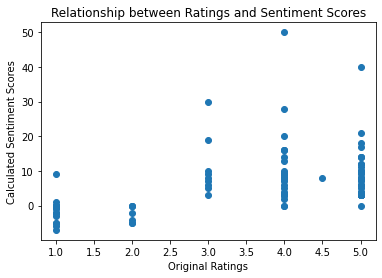

In [128]:
#graph of calculated scores vs empiric rating

plt.scatter(float_ratings, sample_scores)
plt.xlabel('Original Ratings')
plt.ylabel('Calculated Sentiment Scores')
plt.title('Relationship between Ratings and Sentiment Scores')
plt.show()

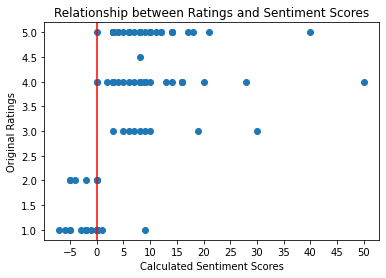

In [142]:
plt.scatter(sample_scores, float_ratings)
plt.ylabel('Original Ratings')
plt.xticks([-5,0,5,10,15,20,25,30,35,40,45,50])
plt.axvline(0,color='r')
plt.xlabel('Calculated Sentiment Scores')
plt.title('Relationship between Ratings and Sentiment Scores')
plt.show()


The first detail about the graph produced that is evident is the fact that on the y axis, most numbers are above 0. even for the 

suppose we set a classification barrier at 0 (red line). Then all data points under 0 would be classified as negative, which we see aligns with scores 1 and 2 of original ratings. 
positive scores would be classed as positive


This seems pretty good aside from some outliers. one interesting one is that one datapoint on 1 would be classified as 

In [ ]:
#graph/table of misclassification errors.

## Stage 2. 

In [68]:
import torch
import torchtext
import torch.nn.functional as F
import torch.nn as nn
from torchtext import data
from torch.utils.data import DataLoader, TensorDataset

In [69]:
#General things

vocab_size = 20000
sigma_lr = 0.005 #Learning Rate
batch_size = 128
epochs = 15

embed_dim = 128
hidden_dim = 256
n_classes = 2
n_layers = 2
dropout = 0.5

In [14]:
new_data = data[['Review','Rating']]

In [15]:
new_data.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5


In [40]:
X = new_data.drop(columns=['Rating'])
Y = new_data['Rating']

X_train, X_text, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [41]:
Y_train.value_counts()

5      3064
4      1885
1      1402
3       948
2       548
4.5      61
3.5      40
2.5      13
1.5       9
Name: Rating, dtype: int64

In [48]:
tokens = [word_tokenize(review.lower()) for review in X_train]
all_tokens = [token for sublist in tokens for token in sublist]
vocab = Counter(all_tokens)
print(vocab)

Counter({'review': 1})


In [52]:
X_train['Review'].head()

9254    Went for a dinner buffet for a family gatherin...
1561                                        excellent job
1670    a must visit for great North Indian food, reli...
6087    Excellent place! Perfect for an after work bee...
6669                                         good service
Name: Review, dtype: object

In [60]:
tokenized_reviews = X_train['Review'].apply(lambda x: word_tokenize(str(x).lower()))

In [56]:
X_train['Tokenized_text'].head()

9254    [went, for, a, dinner, buffet, for, a, family,...
1561                                     [excellent, job]
1670    [a, must, visit, for, great, north, indian, fo...
6087    [excellent, place, !, perfect, for, an, after,...
6669                                      [good, service]
Name: Tokenized_text, dtype: object

In [61]:
all_tokens = [token for review in tokenized_reviews for token in review]

vocab = Counter(all_tokens)

word_to_index = {word: index for index, (word, _) in enumerate(vocab.items())}
index_to_word = {index: word for word, index in word_to_index.items()}

# Vocabulary size
vocab_size = len(word_to_index)

In [66]:
print(vocab_size)

16366


In [71]:
embedding = nn.Embedding(vocab_size, embed_dim)

class RNN(nn.Module):
    def __init__(self, embed_dim, hidden_dim, n_layers, n_classes, dropout):
        super().__init__()
        self.embedding = embedding
        self.rnn = nn.LSTM(embed_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim, n_classes)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.rnn(embedded)
        hidden = self.dropout(hidden[-1, :, :])  # Use the last hidden state
        return self.fc(hidden)   
    
    
    
model = RNN(embed_dim, hidden_dim, n_layers, n_classes, dropout)

print(model)

RNN(
  (embedding): Embedding(20000, 128)
  (rnn): LSTM(128, 256, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=256, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


## Stage 3: Word embeddings and visualisation

In [1]:
from gensim.models import Word2Vec

In [37]:
#start with just one review.
n = random.randint(0,9999)
review = data['Review'][n]
print(n)
print(review)

4407
The name is so appealing that when we saw it,we were like, yes let's go.
Because all of us just looovee the movie 😁
But also because it's on a busy roadside. Very convenient location.

It was Wednesday and had a ladies night I think. But as you know, gold can't be availed with ladies' night privileges 😔

We got seating very easily. Don't know of that was a good thing or bad, because the place was very empty. Only 2 other tables were seated I think.

Ambience is okay.. music- can be better. Cocktails were good. You can actually tell them to do some tweaks to your drinks as per your likeness and they would do it.
Service- can be better. was slow , when you look there were very less crowd.
Food is very nice. Pocket friendly place.

Hope next time I get to see a good crowd and good music


In [38]:
#tokenize it
words = re.sub(r'[^\w\s]','',review)
#words = word_tokenize(words.lower())
words = words.split()
print(words)

['The', 'name', 'is', 'so', 'appealing', 'that', 'when', 'we', 'saw', 'itwe', 'were', 'like', 'yes', 'lets', 'go', 'Because', 'all', 'of', 'us', 'just', 'looovee', 'the', 'movie', 'But', 'also', 'because', 'its', 'on', 'a', 'busy', 'roadside', 'Very', 'convenient', 'location', 'It', 'was', 'Wednesday', 'and', 'had', 'a', 'ladies', 'night', 'I', 'think', 'But', 'as', 'you', 'know', 'gold', 'cant', 'be', 'availed', 'with', 'ladies', 'night', 'privileges', 'We', 'got', 'seating', 'very', 'easily', 'Dont', 'know', 'of', 'that', 'was', 'a', 'good', 'thing', 'or', 'bad', 'because', 'the', 'place', 'was', 'very', 'empty', 'Only', '2', 'other', 'tables', 'were', 'seated', 'I', 'think', 'Ambience', 'is', 'okay', 'music', 'can', 'be', 'better', 'Cocktails', 'were', 'good', 'You', 'can', 'actually', 'tell', 'them', 'to', 'do', 'some', 'tweaks', 'to', 'your', 'drinks', 'as', 'per', 'your', 'likeness', 'and', 'they', 'would', 'do', 'it', 'Service', 'can', 'be', 'better', 'was', 'slow', 'when', 'you

In [39]:
model = Word2Vec([words],vector_size=100, window=5, min_count=1, sg=0)
print(model)

Word2Vec<vocab=105, vector_size=100, alpha=0.025>


In [18]:
from sklearn.decomposition import PCA

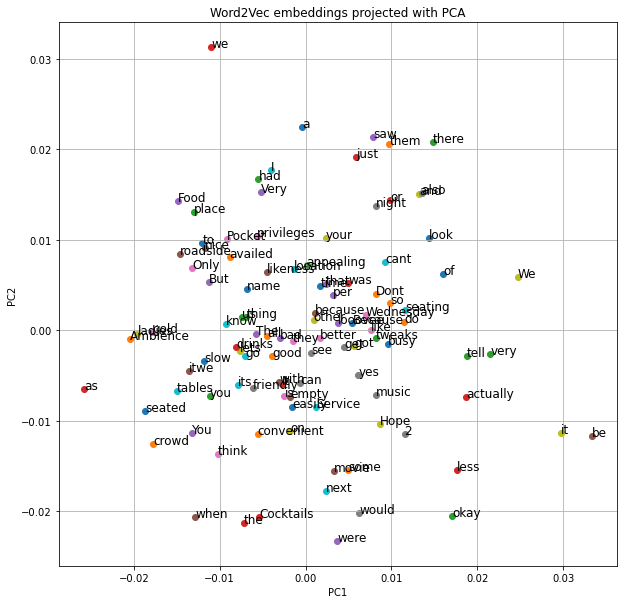

In [40]:
vocab = model.wv.key_to_index
#X = model[model.wv.key_to_index]

X=[model.wv[word] for word in vocab]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

#word22d= {word: vec for word, vec in zip(vocab, result)}

plt.figure(figsize=(10,10))
for word, (x,y) in zip(vocab, result):
    plt.scatter(x,y)
    plt.text(x, y, word, fontsize=12)
    
plt.title("Word2Vec embeddings projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [31]:
similarity_score = model.wv.similarity("good", "great")
print(f"Similarity between 'word1' and 'word2': {similarity_score:.2f}")

similarity_score = model.wv.similarity("great", "recommend")
print(f"Similarity between 'word1' and 'word2': {similarity_score:.2f}")


Similarity between 'word1' and 'word2': 0.07
Similarity between 'word1' and 'word2': 0.12


In [32]:
vocab_words = model.wv.index_to_key
print("Vocabulary Words:", vocab_words)

Vocabulary Words: ['food', 'great', 'I', 'good', 'order', 'experience', 'so', 'far', 'The', 'as', 'been', 'every', 'time', 'highly', 'bee', 'recommend', 'their', 'mutton', 'and', 'Murg', 'biryani', 'Delivery', 'by', 'zomato', 'has', 'also', 'Awesome']
